    DataSize  BlockSize  CPUBandwidth  GPUBandwidth  optGPUBandwidth
0        256          8       5.37262      0.047655         0.048573
1        512          8       5.20313      0.096258         0.098774
2       1024          8       5.11955      0.209234         0.222786
3       2048          8       5.08373      0.389228         0.413294
4       4096          8       5.06376      0.639765         0.713125
..       ...        ...           ...           ...              ...
59      8192       1024       5.05181      1.080980         1.440570
60     16384       1024       5.04844      1.668750         2.789670
61     32768       1024       5.04359      2.641770         5.313650
62     65536       1024       4.92414      3.859520         9.674700
63    131072       1024       5.04343      5.132320        18.780700

[64 rows x 5 columns]
   DataSize  BlockSize  CPUBandwidth  GPUBandwidth  optGPUBandwidth
0       256          8       5.37262      0.047655         0.048573
1       512  

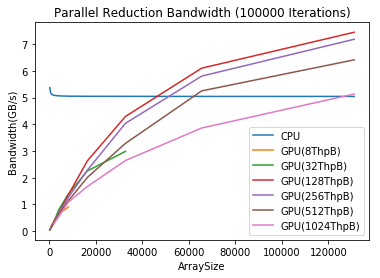

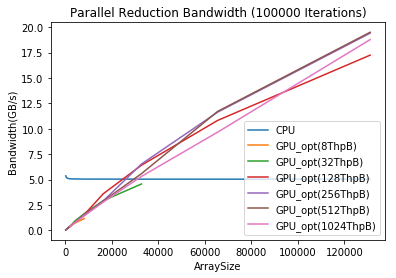

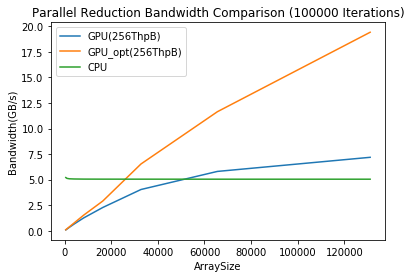

   DataSize  BlockSize  CPUBandwidth  GPUBandwidth  optGPUBandwidth
0       256          8       5.37262      0.047655         0.048573
1       512          8       5.20313      0.096258         0.098774
2      1024          8       5.11955      0.209234         0.222786
3      2048          8       5.08373      0.389228         0.413294
4      4096          8       5.06376      0.639765         0.713125
5      8192          8       5.05101      0.896047         1.160610
    DataSize  BlockSize  CPUBandwidth  GPUBandwidth  optGPUBandwidth
13       256         32       5.37246      0.045370         0.049163
14       512         32       4.92820      0.084965         0.095580
15      1024         32       5.12292      0.181690         0.196331
16      2048         32       5.08347      0.354085         0.378915
17      4096         32       5.06405      0.796744         0.910051
18      8192         32       5.05132      1.384920         1.651280
19     16384         32       5.04649    

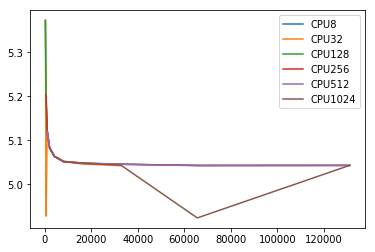

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("greduction.txt", delimiter = " ", index_col = False)
X = pd.DataFrame(X)
print(X)

VaryData8 = X.loc[X["BlockSize"] == 8]
VaryData32 = X.loc[X["BlockSize"] == 32]
VaryData128 = X.loc[X["BlockSize"] == 128]
VaryData256 = X.loc[X["BlockSize"] == 256]
VaryData512 = X.loc[X["BlockSize"] == 512]
VaryData1024 = X.loc[X["BlockSize"] == 1024]
#VaryData8.drop(VaryData8.tail(1).index,inplace=True)
#Varythreads = X.loc[X["DataSize"] == 8192]
#Varythreads.drop(6,inplace = True)
print(VaryData8)
#print(Varythreads)
#plt.title("Parallel reduction for array of size = 8196")
#plt.plot(Varythreads["BlockSize"],Varythreads["CPUBandwidth"], label = "CPU")
#plt.plot(Varythreads["BlockSize"],Varythreads["GPUBandwidth"], label = "GPU")
#plt.plot(Varythreads["BlockSize"],Varythreads["optGPUBandwidth"], label = "GPU_opt")

#plt.xlabel("BlockSize")
#plt.ylabel("Bandwidth(GB/s)")
#plt.legend()
#plt.savefig("plots/Varythreads.png")
#plt.show()

plt.title("Parallel Reduction Bandwidth (100000 Iterations)")
plt.plot(VaryData128["DataSize"],VaryData128["CPUBandwidth"], label = "CPU")
plt.plot(VaryData8["DataSize"],VaryData8["GPUBandwidth"], label = "GPU(8ThpB)")
plt.plot(VaryData32["DataSize"],VaryData32["GPUBandwidth"], label = "GPU(32ThpB)")
plt.plot(VaryData128["DataSize"],VaryData128["GPUBandwidth"], label = "GPU(128ThpB)")
plt.plot(VaryData256["DataSize"],VaryData256["GPUBandwidth"], label = "GPU(256ThpB)")
plt.plot(VaryData512["DataSize"],VaryData512["GPUBandwidth"], label = "GPU(512ThpB)")
plt.plot(VaryData1024["DataSize"],VaryData1024["GPUBandwidth"], label = "GPU(1024ThpB)")

plt.xlabel("ArraySize")
plt.ylabel("Bandwidth(GB/s)")
plt.legend(prop={'size' : 10})
plt.savefig("plots/VarySizeGPU.png")
plt.show()

plt.title("Parallel Reduction Bandwidth (100000 Iterations)")
plt.plot(VaryData128["DataSize"],VaryData128["CPUBandwidth"], label = "CPU")
plt.plot(VaryData8["DataSize"],VaryData8["optGPUBandwidth"], label = "GPU_opt(8ThpB)")
plt.plot(VaryData32["DataSize"],VaryData32["optGPUBandwidth"], label = "GPU_opt(32ThpB)")
plt.plot(VaryData128["DataSize"],VaryData128["optGPUBandwidth"], label = "GPU_opt(128ThpB)")
plt.plot(VaryData256["DataSize"],VaryData256["optGPUBandwidth"], label = "GPU_opt(256ThpB)")
plt.plot(VaryData512["DataSize"],VaryData512["optGPUBandwidth"], label = "GPU_opt(512ThpB)")
plt.plot(VaryData1024["DataSize"],VaryData1024["optGPUBandwidth"], label = "GPU_opt(1024ThpB)")

plt.xlabel("ArraySize")
plt.ylabel("Bandwidth(GB/s)")
plt.legend(prop={'size' : 10})
plt.savefig("plots/VarySizeGPU_opt.png")
plt.show()

plt.title("Parallel Reduction Bandwidth Comparison (100000 Iterations)")
plt.plot(VaryData256["DataSize"],VaryData256["GPUBandwidth"], label = "GPU(256ThpB)")
plt.plot(VaryData256["DataSize"],VaryData256["optGPUBandwidth"], label = "GPU_opt(256ThpB)")
plt.plot(VaryData256["DataSize"],VaryData256["CPUBandwidth"], label = "CPU")
plt.xlabel("ArraySize")
plt.ylabel("Bandwidth(GB/s)")
plt.legend(prop={'size' : 10})
plt.savefig("plots/VarySizeGPUComp.png")
plt.show()
print(VaryData8)
print(VaryData32)

plt.plot(VaryData8["DataSize"],VaryData8["CPUBandwidth"], label = "CPU8")
plt.plot(VaryData32["DataSize"],VaryData32["CPUBandwidth"], label = "CPU32")
plt.plot(VaryData128["DataSize"],VaryData128["CPUBandwidth"], label = "CPU128")
plt.plot(VaryData256["DataSize"],VaryData256["CPUBandwidth"], label = "CPU256")
plt.plot(VaryData512["DataSize"],VaryData512["CPUBandwidth"], label = "CPU512")
plt.plot(VaryData1024["DataSize"],VaryData1024["CPUBandwidth"], label = "CPU1024")
plt.legend()
plt.show()